# UPLOAD DATA

In [ ]:
from google.colab import drive #montare il drive
drive.mount('/content/drive')

In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/TESI MARTINO FUSI/archive.zip"
extract_path = "/content/drive/MyDrive/TESI MARTINO FUSI/SAMLD_extracted"

# Estrai il file ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Controlla i file estratti
os.listdir(extract_path)

In [ ]:
import pandas as pd

csv_path = os.path.join(extract_path, "SAML-D.csv")   #salva il file e leggi il file
df = pd.read_csv(csv_path)

df.head()

# EXPLORATORY ANALYSIS
In this part we look at the data, extracting all the uselful information

In [2]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 5.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from PIL import Image
from scipy.stats import skew
from matplotlib.transforms import Bbox
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, auc, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, auc, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

In [4]:
# ripeto per facilità, connesso a v2-8 TPU google
csv_SAMLD = "/content/drive/MyDrive/TESI MARTINO FUSI/SAMLD_extracted/SAML-D.csv"
df = pd.read_csv(csv_SAMLD)

In [5]:
print(df.shape)
df.head()

(9504852, 12)


,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits


In [6]:
df.tail()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type,Time_Date
9504847,10:57:01,2023-08-23,2453933570,519744068,2247.25,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out,2023-08-23 10:57:01
9504848,10:57:06,2023-08-23,9805510177,5416607878,927.18,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Small_Fan_Out,2023-08-23 10:57:06
9504849,10:57:06,2023-08-23,7282330957,2995527149,1455.14,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out,2023-08-23 10:57:06
9504850,10:57:11,2023-08-23,940337377,4812815165,25995.70,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In,2023-08-23 10:57:11
9504851,10:57:12,2023-08-23,105185176,6824994831,9586.08,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_Out,2023-08-23 10:57:12


In [4]:
# creazione colonna Time_Date per gestire le colonne Tempo e Data
#df['Time_Date'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 13 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Time                    object        
 1   Date                    object        
 2   Sender_account          int64         
 3   Receiver_account        int64         
 4   Amount                  float64       
 5   Payment_currency        object        
 6   Received_currency       object        
 7   Sender_bank_location    object        
 8   Receiver_bank_location  object        
 9   Payment_type            object        
 10  Is_laundering           int64         
 11  Laundering_type         object        
 12  Time_Date               datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 942.7+ MB


In [8]:
# controllare dati mancanti
print(df.isnull().sum())

Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
Time_Date                 0
dtype: int64


In [9]:
# numero di transazioni per tipo e numero di transazioni laundering per tipo
transactions_per_payment_type = df['Payment_type'].value_counts()   # conta numero di transazioni per tipo
laundering_transactions_per_payment_type = df[df['Is_laundering'] == 1].groupby('Payment_type').size() # numero di trasnazioni per tipo con is laundering == 1
transactions_per_payment_type, laundering_transactions_per_payment_type

(Payment_type
 Credit card        2012909
 Debit card         2012103
 Cheque             2011419
 ACH                2008807
 Cross-border        933931
 Cash Withdrawal     300477
 Cash Deposit        225206
 Name: count, dtype: int64,
 Payment_type
 ACH                1159
 Cash Deposit       1405
 Cash Withdrawal    1334
 Cheque             1087
 Credit card        1136
 Cross-border       2628
 Debit card         1124
 dtype: int64)

<ipython-input-6-93941f71b236>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_laundering['Month'] = df_laundering['Date'].dt.to_period('M')
<ipython-input-6-93941f71b236>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors =plt.cm.get_cmap("Set3", len(payment_types))


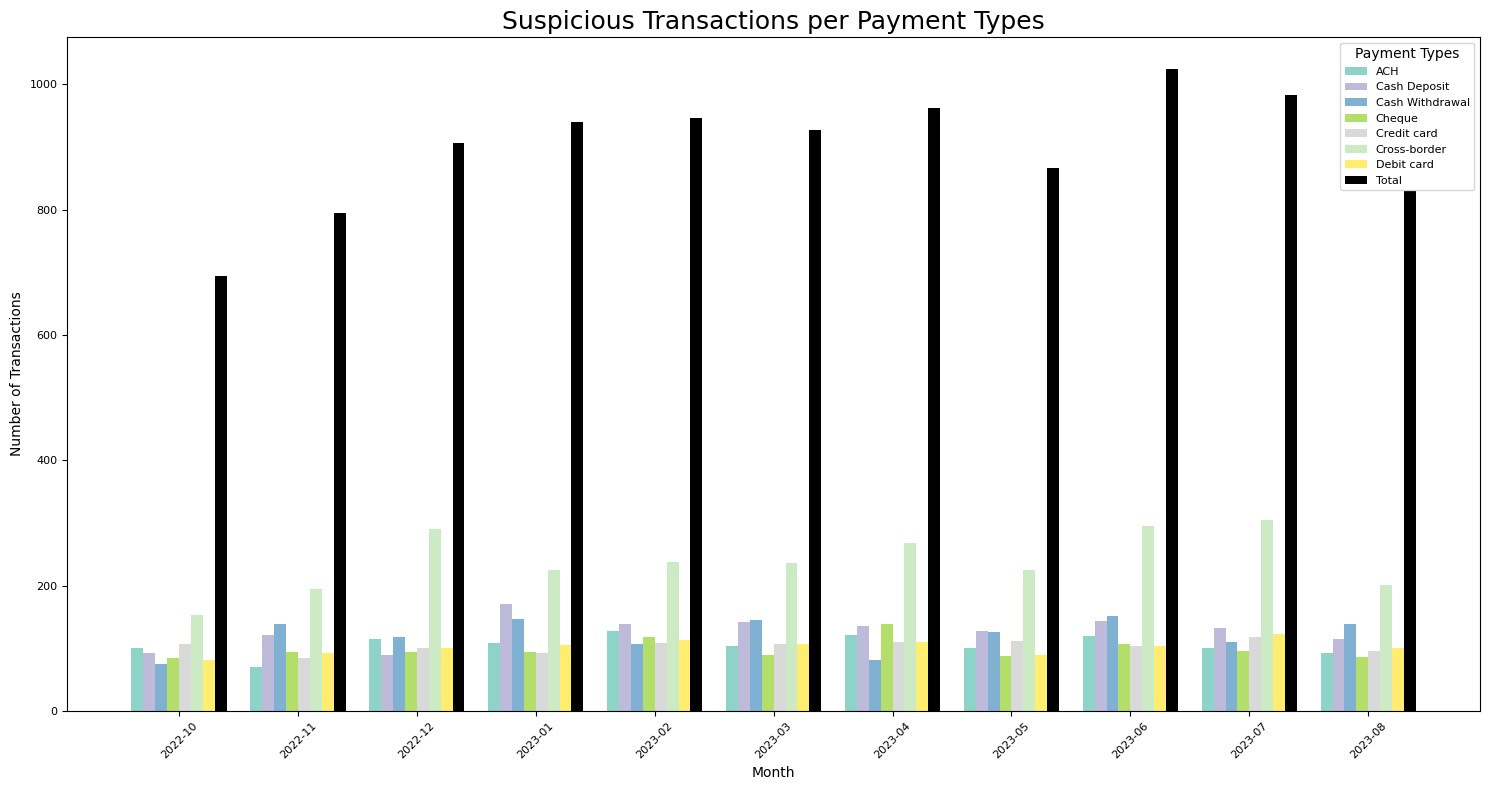

In [6]:
# Converti la colonna 'Date' in formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filtra solo le transazioni Is_laundering
df_laundering = df[df['Is_laundering'] == 1]

# Estrai il mese dalla data
df_laundering['Month'] = df_laundering['Date'].dt.to_period('M')

# Raggruppa per mese e tipo di pagamento, e conta le transazioni
grouped = df_laundering.groupby(['Month', 'Payment_type']).size().unstack(fill_value=0)

# Calcola il totale delle transazioni per ogni mese
grouped['Total'] = grouped.sum(axis=1)

# Prepara i dati per il grafico
months = grouped.index.astype(str)  # Converti i mesi in stringhe per l'asse x
payment_types = grouped.columns[:-1]  # Escludi la colonna 'Total'
x = np.arange(len(months))  # Posizioni sull'asse x

# Crea il grafico a barre separate
plt.figure(figsize=(15, 8))
bar_width = 0.1  # Larghezza delle barre
colors =plt.cm.get_cmap("Set3", len(payment_types))

# Disegna le barre per ogni tipo di pagamento
for i, payment_type in enumerate(payment_types):
    plt.bar(x + i * bar_width, grouped[payment_type], width=bar_width, label=payment_type, color =colors(i))

# Aggiungi la barra del totale
plt.bar(x + len(payment_types) * bar_width, grouped['Total'], width=bar_width, label='Total', color='black')

# Aggiungi etichette e titolo
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Suspicious Transactions per Payment Types', fontsize=18)
plt.xticks(x + (len(payment_types) * bar_width) / 2, months, rotation=45, fontsize=8)  # Posiziona le etichette dei mesi al centro
plt.legend(title='Payment Types', fontsize= 8)
plt.yticks(fontsize=8)

# Mostra il grafico
plt.tight_layout()
plt.show()

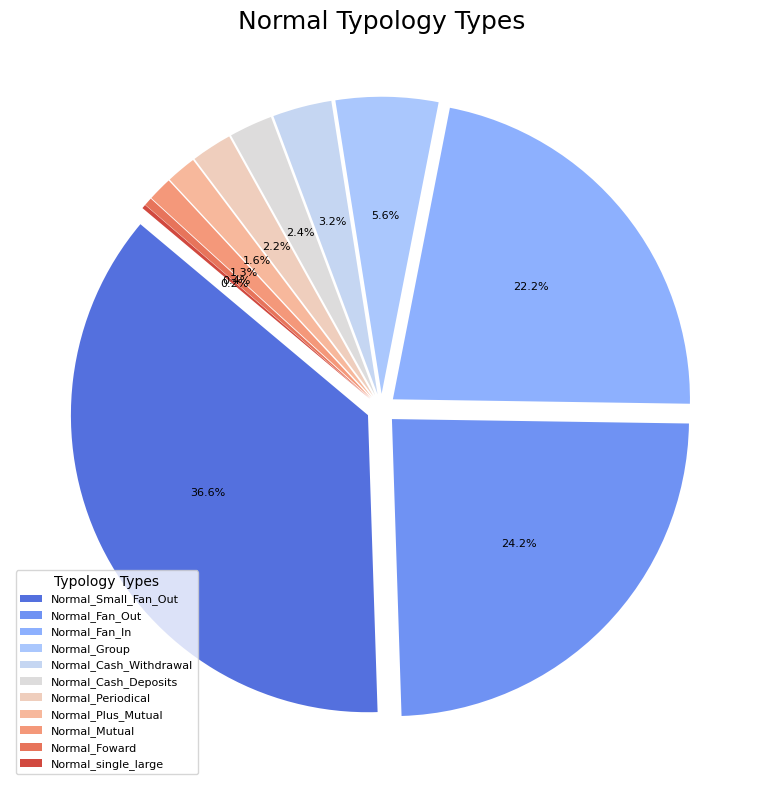

In [34]:
# Pie chart per le transazioni per laundering type per transazioni normali
normal_data = df[df['Is_laundering'] == 0]['Laundering_type'].value_counts() # conta i dati normali


palette_normal = sns.color_palette("coolwarm", len(normal_data)) # palette per i colori

plt.figure(figsize=(8, 8))

explode_normal = [0.05] * len(normal_data) # per staccare le fette del pie chart

# Crea il pie chart
patches, texts, autotexts = plt.pie(normal_data, explode=explode_normal, autopct='%1.1f%%', colors=palette_normal, startangle=140)
plt.title('Normal Typology Types', fontsize=18)


plt.legend(patches, normal_data.index, loc='best', title="Typology Types", fontsize=8) # Aggiungi una legenda

# Imposta la dimensione del font per i testi e le percentuali
for text in texts + autotexts:
    text.set_fontsize(8)

# Mostra il grafico
plt.tight_layout()
plt.show()

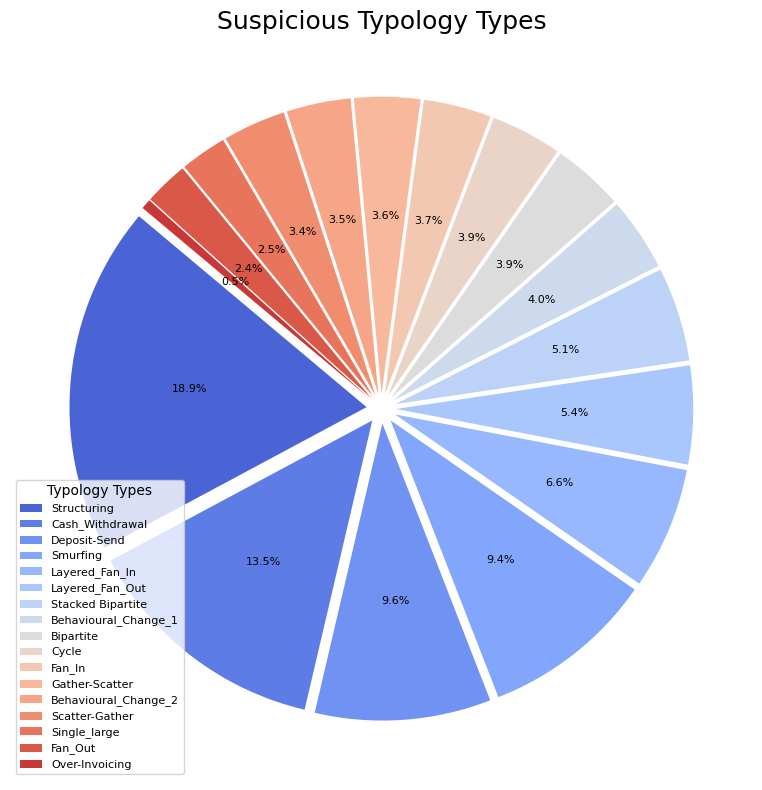

In [35]:
laundering_data = df[df['Is_laundering'] == 1]['Laundering_type'].value_counts() # Filtra i dati per Is_laundering == 1 (solo dati sospetti)
palette_laundering = sns.color_palette("coolwarm", len(laundering_data)) # Palette


plt.figure(figsize=(8, 8))


explode_laundering = [0.05] * len(laundering_data)

# Crea il pie chart
patches, texts, autotexts = plt.pie(laundering_data, explode=explode_laundering, autopct='%1.1f%%', colors=palette_laundering, startangle=140)
plt.title('Suspicious Typology Types', fontsize=18)

# Aggiungi una legenda
plt.legend(patches, laundering_data.index, loc='best', title="Typology Types", fontsize=8)

# Imposta la dimensione del font per i testi e le percentuali
for text in texts + autotexts:
    text.set_fontsize(8)

# Mostra il grafico
plt.tight_layout()
plt.show()

In [38]:
# per fare tabella tipo excel per poi esportarla
total_amount_pivot = pd.pivot_table(df, index=["Payment_type"],values='Amount', aggfunc=np.sum) #totale in GBP per tipo di pagamento

laundering_count_pivot = df[df['Is_laundering'] == 1].groupby('Payment_type').size().to_frame('Laundering_Count') #laundering type conta

normal_count_pivot = df[df['Is_laundering'] == 0].groupby('Payment_type').size().to_frame('Normal_Count') #normal type conta

combined_pivot = total_amount_pivot.join([laundering_count_pivot,normal_count_pivot], how='outer')  #combinare normali e laundering per tipo
combined_pivot = combined_pivot.fillna(0)

cm = sns.light_palette("blue", as_cmap=True) #stile della tabella blue
styled_combined_pivot = combined_pivot.style.background_gradient(cmap=cm)

styled_combined_pivot

<ipython-input-38-10e4c849d8be>:2: FutureWarning: The provided callable <function sum at 0x7ce501edbb00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_amount_pivot = pd.pivot_table(df, index=["Payment_type"],values='Amount', aggfunc=np.sum)


,Amount,Laundering_Count,Normal_Count
Payment_type,,,
ACH,18272052011.854218,1159,2007648
Cash Deposit,485809045.640000,1405,223801
Cash Withdrawal,46118125.580000,1334,299143
Cheque,18328875956.816402,1087,2010332
Credit card,18308924931.183823,1136,2011773
Cross-border,9476591292.695444,2628,931303
Debit card,18372338763.838520,1124,2010979


In [39]:
# contiamo le proporzioni di tra laundering e non laundering
df['Is_laundering'].value_counts(normalize=True) * 100

,proportion
Is_laundering,
0,99.896127
1,0.103873


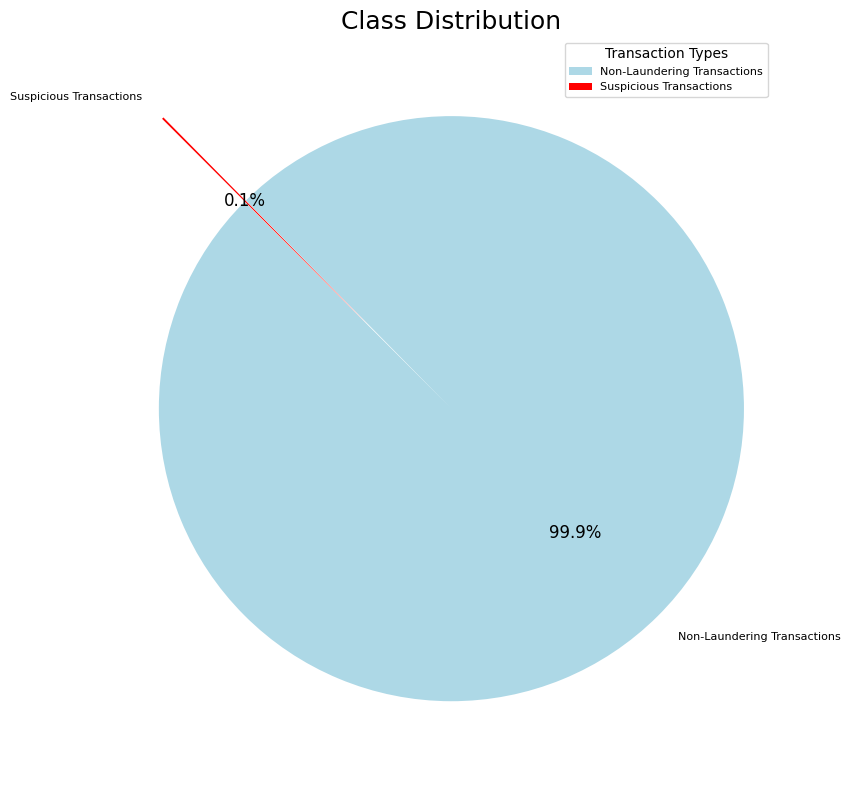

In [54]:
class_distribution = df['Is_laundering'].value_counts()

# Definisci una palette di colori
colors = ['lightblue', 'red']

# Imposta l'esplosione delle fette
explode = [0.2] * len(class_distribution)  # Tutte le fette esplose di 0.1

# Crea il grafico
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(class_distribution,explode=explode,labels=['Non-Laundering Transactions', 'Suspicious Transactions'],
                                    autopct='%1.1f%%',
                                    colors=colors,
                                    startangle=135)

# Aggiungi un titolo
plt.title('Class Distribution', fontsize=18)

# Aggiungi una legenda
plt.legend(patches, ['Non-Laundering Transactions', 'Suspicious Transactions'], loc='best', title="Transaction Types", fontsize=8)

# Imposta la dimensione del font per i testi e le percentuali
for text in texts:
    text.set_fontsize(8)

for autotext in autotexts:
    autotext.set_fontsize(12)

# Mostra il grafico
plt.tight_layout()
plt.axis('equal')  # Assicura che il grafico sia un cerchio perfetto
plt.show()

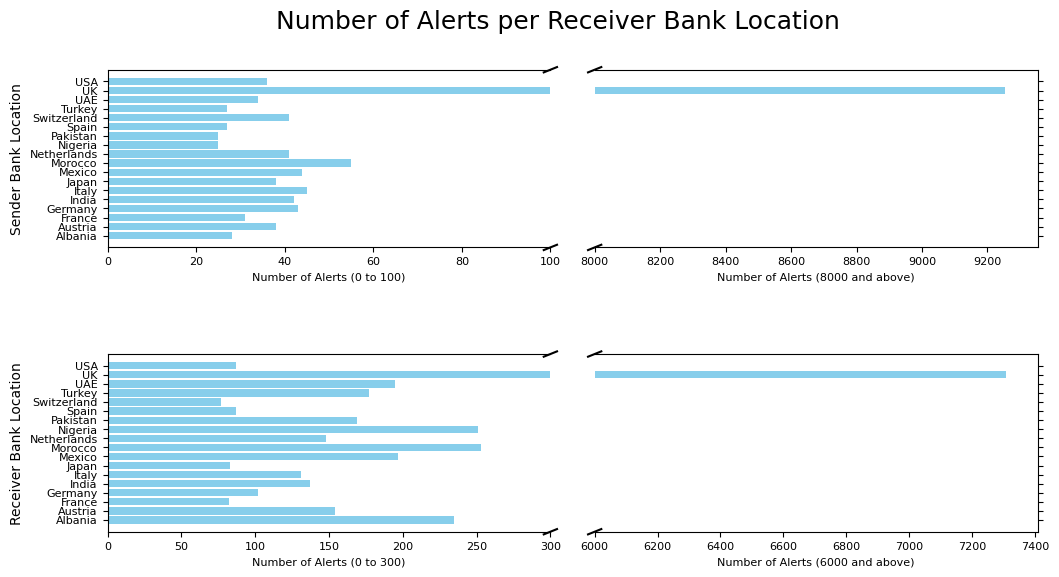

In [10]:
## sender bank
alerts_per_location = df.groupby('Sender_bank_location')['Is_laundering'].sum().reset_index() #diviso le transazioni per gruppo di sender bank location
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(12, 6)) # impostato grandezza
ax1, ax2, ax3, ax4 = axes.flatten() # chiamo variabili per i quattro assi
fig.subplots_adjust(wspace=0.1, hspace=0.6)

# creazione grafici per sender bank location
ax1.barh(alerts_per_location['Sender_bank_location'],alerts_per_location['Is_laundering'], color='skyblue')
ax2.barh(alerts_per_location['Sender_bank_location'],alerts_per_location['Is_laundering'], color='skyblue')
ax1.set_xlim(0, 100) # limite primo grafico
ax2.set_xlim(8000, max(alerts_per_location['Is_laundering']) + 100) #limite secondo grafico
fig.suptitle('Number of Alerts per Sender Bank Location')
# rimozione dei bordi in spines e thick left e tick right
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
ax2.yaxis.tick_right()
ax2.set_yticks([])
ax2.tick_params(axis='x', labelsize=8)
d = .015

# linee diagonali per separazione
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (-d, +d), **kwargs)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
# titoli etichette
ax1.set_xlabel('Number of Alerts (0 to 100)', fontsize=8)
ax2.set_xlabel('Number of Alerts (8000 and above)', fontsize=8)
ax1.set_ylabel('Sender Bank Location')
ax1.set_yticks(range(len(alerts_per_location['Sender_bank_location'])))
ax1.set_yticklabels(alerts_per_location['Sender_bank_location'], fontsize=8)
ax1.tick_params(axis='x', labelsize=8)

## receiver bank
alerts_per_location = df.groupby('Receiver_bank_location')['Is_laundering'].sum().reset_index()

fig.subplots_adjust(wspace=0.1) # Adjust the spacing between subplots
ax3.barh(alerts_per_location['Receiver_bank_location'],alerts_per_location['Is_laundering'], color='skyblue')
ax4.barh(alerts_per_location['Receiver_bank_location'],alerts_per_location['Is_laundering'], color='skyblue')
ax3.set_xlim(0, 300) # Set the left subplot values
ax4.set_xlim(6000, max(alerts_per_location['Is_laundering']) + 100) # Set the right subplot values
fig.suptitle('Number of Alerts per Receiver Bank Location', fontsize=18)
ax3.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax3.yaxis.tick_left()
ax4.yaxis.tick_right()
ax4.set_yticks([])
ax4.tick_params(axis='x', labelsize=8)
d = .015
kwargs = dict(transform =ax3.transAxes, color='k', clip_on=False)
ax3.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax3.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
kwargs.update(transform=ax4.transAxes)
ax4.plot((-d, +d), (-d, +d), **kwargs)
ax4.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax3.set_xlabel('Number of Alerts (0 to 300)', fontsize=8)
ax4.set_xlabel('Number of Alerts (6000 and above)', fontsize=8)
ax3.set_ylabel('Receiver Bank Location')
ax3.set_yticks(range(len(alerts_per_location['Receiver_bank_location'])))
ax3.set_yticklabels(alerts_per_location['Receiver_bank_location'], fontsize=8)
ax3.tick_params(axis='x', labelsize=8)
plt.show()

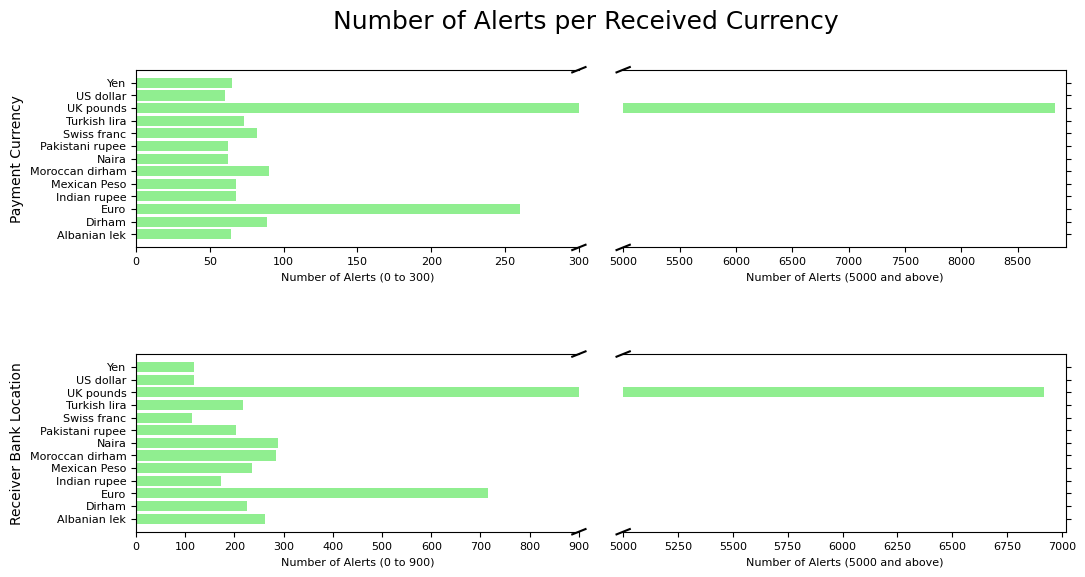

In [11]:
## payment currecies
alerts_per_currecy = df.groupby('Payment_currency')['Is_laundering'].sum().reset_index()
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(12, 6))
ax1, ax2, ax3, ax4 = axes.flatten()
fig.subplots_adjust(wspace=0.1, hspace=0.6)
ax1.barh(alerts_per_currecy['Payment_currency'],alerts_per_currecy['Is_laundering'], color='lightgreen')
ax2.barh(alerts_per_currecy['Payment_currency'],alerts_per_currecy['Is_laundering'], color='lightgreen')
ax1.set_xlim(0, 300) # Set the left subplot values
ax2.set_xlim(5000, max(alerts_per_currecy['Is_laundering']) + 100) # Set the right subplot values
fig.suptitle('Number of Alerts per Payment Currency')
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
ax2.yaxis.tick_right()
ax2.set_yticks([])
ax2.tick_params(axis='x', labelsize=8)
d = .015 # Size of diagonal lines
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (-d, +d), **kwargs)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax1.set_xlabel('Number of Alerts (0 to 300)', fontsize=8)
ax2.set_xlabel('Number of Alerts (5000 and above)', fontsize=8)
ax1.set_ylabel('Payment Currency')
ax1.set_yticks(range(len(alerts_per_currecy['Payment_currency'])))
ax1.set_yticklabels(alerts_per_currecy['Payment_currency'], fontsize=8)
ax1.tick_params(axis='x', labelsize=8)

## received currencies
alerts_per_currecy = df.groupby('Received_currency')['Is_laundering'].sum().reset_index()

fig.subplots_adjust(wspace=0.1) # Adjust the spacing between subplots
ax3.barh(alerts_per_currecy['Received_currency'],alerts_per_currecy['Is_laundering'], color='lightgreen')
ax4.barh(alerts_per_currecy['Received_currency'],alerts_per_currecy['Is_laundering'], color='lightgreen')
ax3.set_xlim(0, 900) # Set the left subplot values
ax4.set_xlim(5000, max(alerts_per_currecy['Is_laundering']) + 100) # Set the right subplot values
fig.suptitle('Number of Alerts per Received Currency', fontsize=18)
ax3.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax3.yaxis.tick_left()
ax4.yaxis.tick_right()
ax4.set_yticks([])
ax4.tick_params(axis='x', labelsize=8)
d = .015
kwargs = dict(transform =ax3.transAxes, color='k', clip_on=False)
ax3.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax3.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
kwargs.update(transform=ax4.transAxes)
ax4.plot((-d, +d), (-d, +d), **kwargs)
ax4.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax3.set_xlabel('Number of Alerts (0 to 900)', fontsize=8)
ax4.set_xlabel('Number of Alerts (5000 and above)', fontsize=8)
ax3.set_ylabel('Receiver Bank Location')
ax3.set_yticks(range(len(alerts_per_currecy['Received_currency'])))
ax3.set_yticklabels(alerts_per_currecy['Received_currency'], fontsize=8)
ax3.tick_params(axis='x', labelsize=8)
plt.show()

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format = '%H:%M:%S')

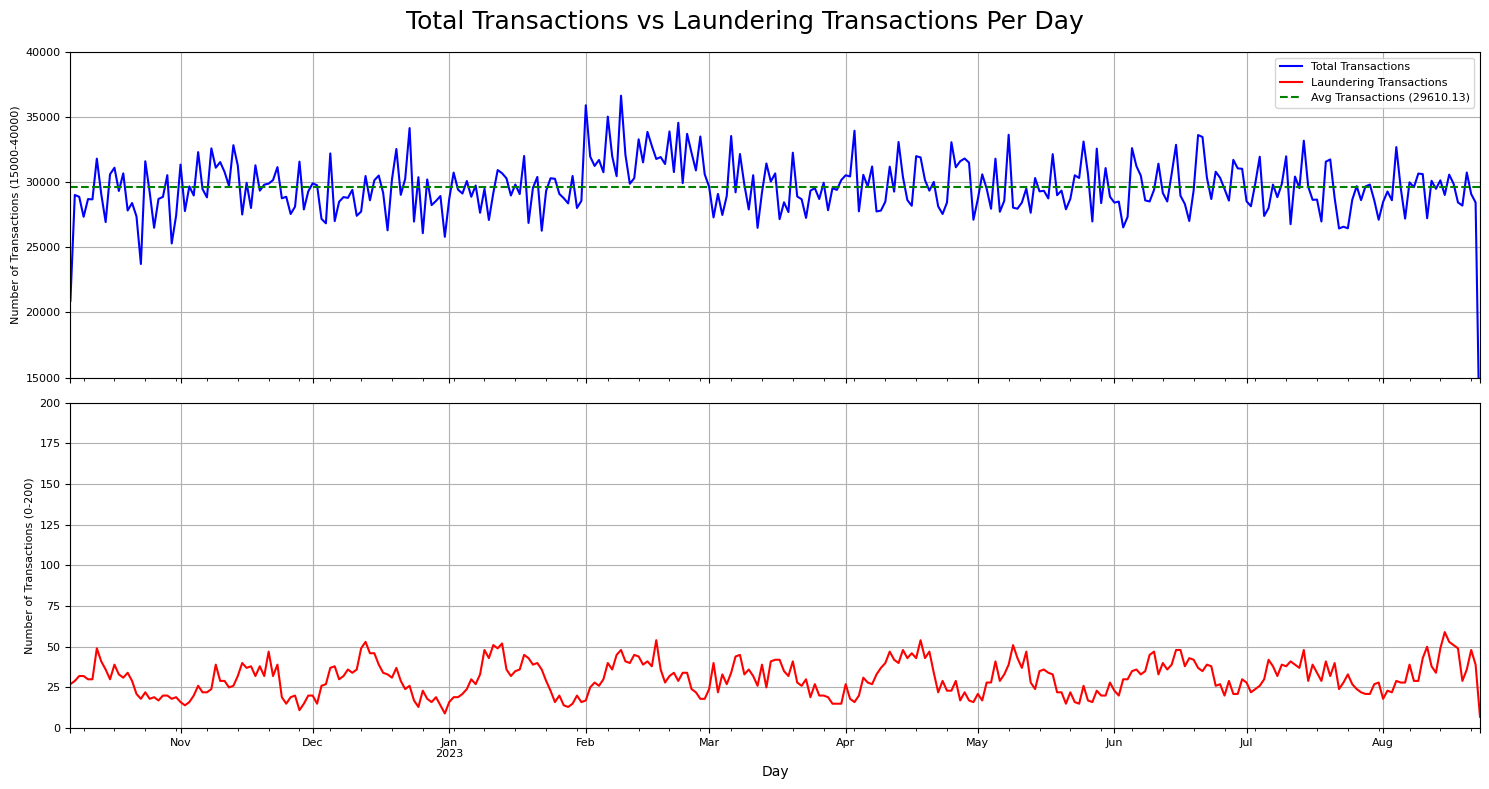

In [12]:
# Assicurati che la colonna data sia in datetime
df['Date'] = pd.to_datetime(df['Date'])

# Raggruppa per giorno e conta il numero totale di transazioni
monthly_transactions = df.groupby(df['Date'].dt.to_period('D')).size()

# Raggruppa per giorno e conta solo le transazioni di riciclaggio
monthly_laundering_transactions = df[df['Is_laundering'] == 1].groupby(df['Date'].dt.to_period('D')).size()

# Media delle transazioni giornaliere
average_monthly_transactions = monthly_transactions.mean()

# Creazione del grafico con due subplot
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 8))

# Grafico superiore (15k-40k)
monthly_transactions.plot(kind='line', label='Total Transactions', color='b', ax=ax1)
monthly_laundering_transactions.plot(kind='line', label='Laundering Transactions', color='r', ax=ax1)
ax1.axhline(y=average_monthly_transactions, color='g', linestyle='--', label=f'Avg Transactions ({average_monthly_transactions:.2f})')
ax1.set_ylim(15000, 40000)
ax1.set_ylabel('Number of Transactions (15000-40000)', fontsize=8)
ax1.tick_params(axis='x', labelsize=8)
ax1.tick_params(axis='y', labelsize=8)
ax1.legend(fontsize=8)
ax1.grid(True)

# Grafico inferiore (0-200)
monthly_transactions.plot(kind='line', label='Total Transactions', color='b', ax=ax2)
monthly_laundering_transactions.plot(kind='line', label='Laundering Transactions', color='r', ax=ax2)
ax2.axhline(y=average_monthly_transactions, color='g', linestyle='--', label=f'Avg Transactions ({average_monthly_transactions:.2f})')
ax2.set_ylim(0, 200)
ax2.set_ylabel('Number of Transactions (0-200)', fontsize=8)
ax2.tick_params(axis='x', labelsize=8)
ax2.tick_params(axis='y', labelsize=8)

ax2.grid(True)

# Personalizzazione
plt.xlabel('Day')
plt.suptitle('Total Transactions vs Laundering Transactions Per Day', fontsize=18)
plt.tight_layout()  # Migliora la spaziatura tra i subplot
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


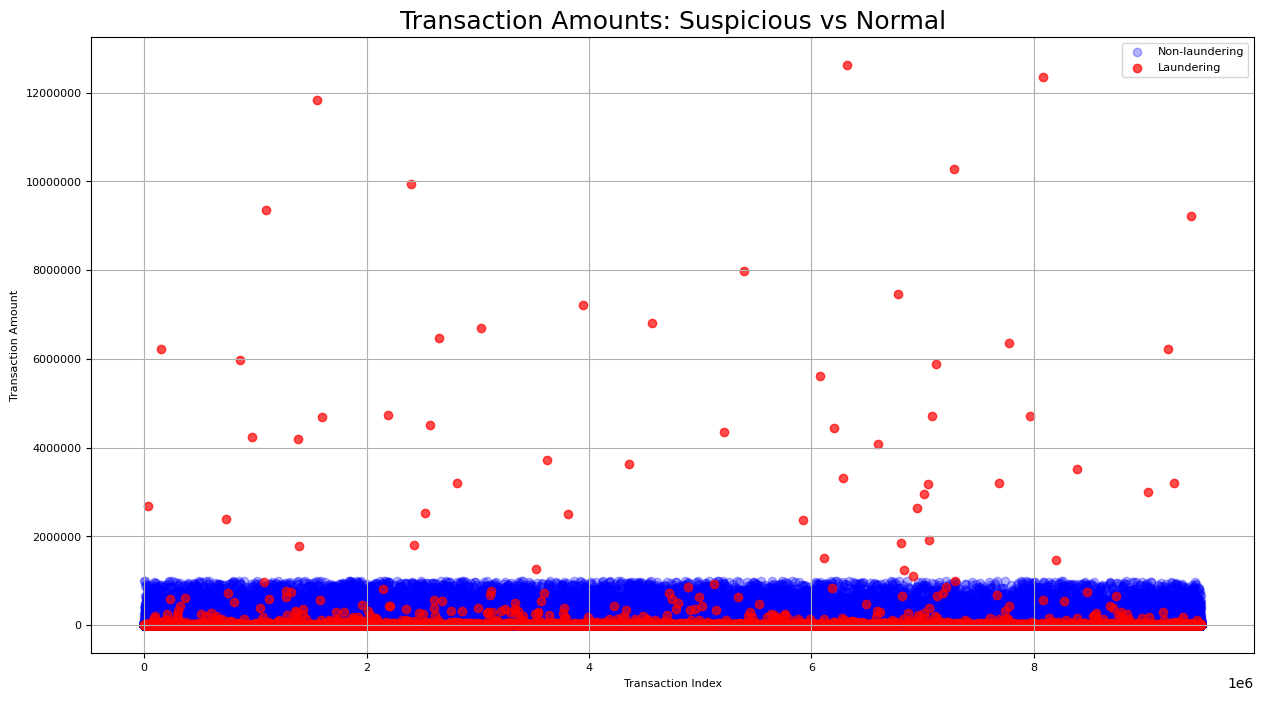

In [13]:
laundering_data = df[df['Is_laundering'] == 1]
non_laundering_data = df[df['Is_laundering'] == 0]
plt.figure(figsize=(15, 8))

# Scatter plot per le transazioni normali
plt.scatter(non_laundering_data.index, non_laundering_data['Amount'],
            color='blue', label='Non-laundering', alpha=0.3)

# Scatter plot per le transazioni sospette
plt.scatter(laundering_data.index, laundering_data['Amount'],
            color='red', label='Laundering', alpha=0.7)

plt.title('Transaction Amounts: Suspicious vs Normal', fontsize=18)
plt.xlabel('Transaction Index', fontsize=8)
plt.ylabel('Transaction Amount', fontsize=8)
plt.tick_params(axis='both', labelsize=8)
plt.ticklabel_format(axis='y', style='plain')
plt.legend(fontsize = 8)
plt.grid(True)
plt.show()


# FEATURE ENGINEERING




In [15]:
# trasformazione log base di variabile amount
skewed_data = df['Amount']
original_skewness = skew(skewed_data)
print(f"Original Skewness: {original_skewness}")

log_transformed_data = np.log1p(skewed_data)
transformed_skewness = skew(log_transformed_data)
print(f"Log-Transformed Skewness: {transformed_skewness}")

df['Amount'] = log_transformed_data

Original Skewness: 102.16408577285024
Log-Transformed Skewness: -1.0103052224946008


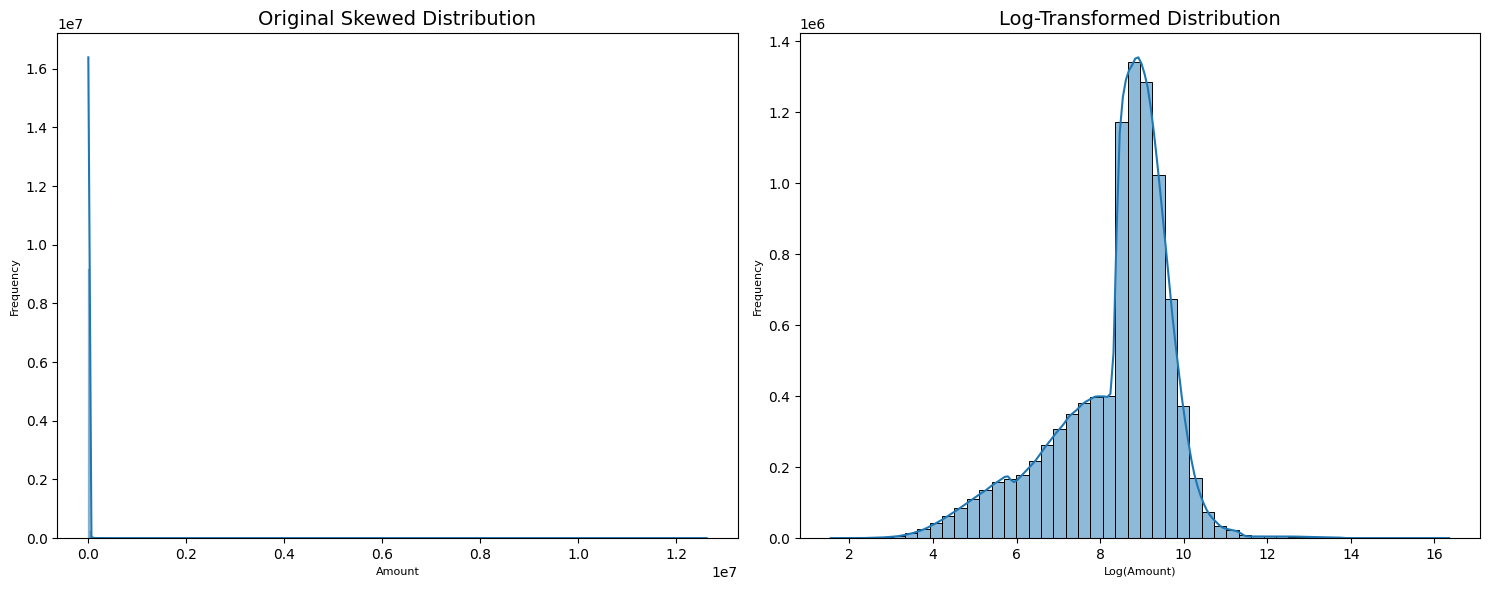

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(skewed_data, bins=500, kde=True, ax=ax[0])
ax[0].set_title('Original Skewed Distribution', fontsize=14)
ax[0].set_xlabel('Amount', fontsize=8)
ax[0].set_ylabel('Frequency', fontsize=8)

sns.histplot(log_transformed_data, bins=50, kde=True, ax=ax[1])
ax[1].set_title('Log-Transformed Distribution', fontsize=14)
ax[1].set_xlabel('Log(Amount)', fontsize=8)
ax[1].set_ylabel('Frequency', fontsize=8)

plt.tight_layout()
plt.show();

In [17]:
# cambio variabili date time
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format = '%H:%M:%S')

df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Minute'] = pd.to_datetime(df['Time']).dt.minute
df['Second'] = pd.to_datetime(df['Time']).dt.second
df['Date_Year'] = pd.to_datetime(df['Date']).dt.year
df['Date_Month'] = pd.to_datetime(df['Date']).dt.month
df['Date_Day'] = pd.to_datetime(df['Date']).dt.day

In [18]:
# One-Hot Encoding delle variabili categoriche (senza drop_first per Random Forest)
df = pd.get_dummies(df, columns=['Payment_currency', 'Received_currency',
                                 'Sender_bank_location', 'Receiver_bank_location',
                                 'Payment_type'], drop_first=False)

df['Sender_transaction_count'] = df.groupby('Sender_account')['Sender_account'].transform('count')
df['Receiver_transaction_count'] = df.groupby('Receiver_account')['Receiver_account'].transform('count')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 85 columns):
 #   Column                              Dtype         
---  ------                              -----         
 0   Time                                datetime64[ns]
 1   Date                                datetime64[ns]
 2   Sender_account                      int64         
 3   Receiver_account                    int64         
 4   Amount                              float64       
 5   Is_laundering                       int64         
 6   Laundering_type                     object        
 7   Time_Date                           datetime64[ns]
 8   Hour                                int32         
 9   Minute                              int32         
 10  Second                              int32         
 11  Date_Year                           int32         
 12  Date_Month                          int32         
 13  Date_Day                            int32 

In [19]:
df_pre = df.copy() # questo mi servirà dopo quindi lo copio prima di droppare le colonne

In [20]:
df.drop(columns=['Laundering_type'], inplace=True)
df.drop(columns=['Time', 'Date'], inplace=True)
#df.drop(columns=['Time_Date'], inplace=True)
df.drop(columns=['Sender_account', 'Receiver_account'], inplace= True)

In [21]:
df.head()

,Amount,Is_laundering,Hour,Minute,Second,Date_Year,Date_Month,Date_Day,Payment_currency_Albanian lek,Payment_currency_Dirham,...,Receiver_bank_location_USA,Payment_type_ACH,Payment_type_Cash Deposit,Payment_type_Cash Withdrawal,Payment_type_Cheque,Payment_type_Credit card,Payment_type_Cross-border,Payment_type_Debit card,Sender_transaction_count,Receiver_transaction_count
0,7.286294,0,10,35,19,2022,10,7,False,False,...,False,False,True,False,False,False,False,False,15,29
1,8.702949,0,10,35,20,2022,10,7,False,False,...,False,False,False,False,False,False,True,False,495,12
2,9.570071,0,10,35,20,2022,10,7,False,False,...,False,False,False,False,True,False,False,False,221,21
3,9.383957,0,10,35,21,2022,10,7,False,False,...,False,True,False,False,False,False,False,False,9,128
4,4.755743,0,10,35,21,2022,10,7,False,False,...,False,False,True,False,False,False,False,False,6,119


In [22]:
# preparo X e y, y è laundering X sono le altre varibili. 78 colonne X 1 colonna y
X = df.drop(columns=['Is_laundering'])
y = df['Is_laundering']

In [23]:
X.head()

,Amount,Hour,Minute,Second,Date_Year,Date_Month,Date_Day,Payment_currency_Albanian lek,Payment_currency_Dirham,Payment_currency_Euro,...,Receiver_bank_location_USA,Payment_type_ACH,Payment_type_Cash Deposit,Payment_type_Cash Withdrawal,Payment_type_Cheque,Payment_type_Credit card,Payment_type_Cross-border,Payment_type_Debit card,Sender_transaction_count,Receiver_transaction_count
0,7.286294,10,35,19,2022,10,7,False,False,False,...,False,False,True,False,False,False,False,False,15,29
1,8.702949,10,35,20,2022,10,7,False,False,False,...,False,False,False,False,False,False,True,False,495,12
2,9.570071,10,35,20,2022,10,7,False,False,False,...,False,False,False,False,True,False,False,False,221,21
3,9.383957,10,35,21,2022,10,7,False,False,False,...,False,True,False,False,False,False,False,False,9,128
4,4.755743,10,35,21,2022,10,7,False,False,False,...,False,False,True,False,False,False,False,False,6,119


In [24]:
y.head()

,Is_laundering
0,0
1,0
2,0
3,0
4,0


# MODELS

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Isolation Forest

In [46]:
# Creazione e addestramento del modello Isolation Forest
iso_forest = IsolationForest(
    n_estimators=500,
    max_samples=1024,
    contamination=0.01,
    bootstrap=True,
    max_features=0.75,
    random_state=12,
    n_jobs=-1
)


iso_forest.fit(X_train)

# Predizioni
y_pred_if = iso_forest.predict(X_test)
y_pred_scores_if = iso_forest.decision_function(X_test)

# Converti le predizioni in formato binario (0 = normale, 1 = anomalia)
y_pred_if_binary = [1 if pred == -1 else 0 for pred in y_pred_if]

# Calcolo delle metriche
precision_if = precision_score(y_test, y_pred_if_binary)
recall_if = recall_score(y_test, y_pred_if_binary)
f1_if = f1_score(y_test, y_pred_if_binary)
roc_auc_if = roc_auc_score(y_test, -y_pred_scores_if)

# Calcolo della Precision-Recall Curve e AUC
precision_points, recall_points, _ = precision_recall_curve(y_test, -y_pred_scores_if)
pr_auc_if = auc(recall_points, precision_points)


Metrics Isolation Forest:
                 Metric     Value
0             Precision  0.009037
1                Recall  0.088101
2              F1 Score  0.016392
3               ROC AUC  0.723374
4  Precision-Recall AUC  0.003501


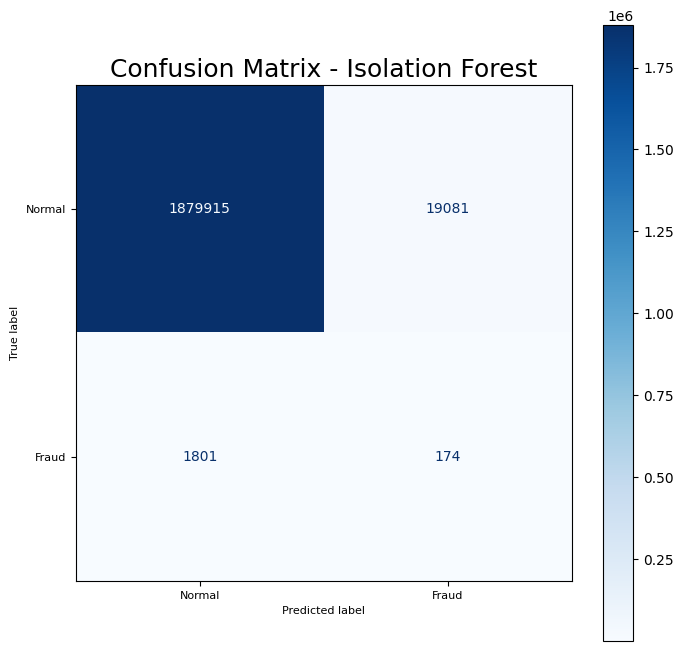

In [47]:
# Creazione di una tabella con le metriche
metrics_table = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'ROC AUC', 'Precision-Recall AUC'],
    'Value': [precision_if, recall_if, f1_if, roc_auc_if, pr_auc_if]
})

print("Metrics Isolation Forest:")
print(metrics_table)

# Creazione della confusion matrix
cm = confusion_matrix(y_test, y_pred_if_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Fraud'])

# Plot della confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d', ax=ax)

# Imposta il titolo con dimensione del font 18
ax.set_title('Confusion Matrix - Isolation Forest', fontsize=18)

# Imposta la dimensione del font degli assi a 8
ax.tick_params(axis='both', labelsize=8)

# Imposta la dimensione del font delle etichette degli assi a 8
ax.set_xlabel('Predicted label', fontsize=8)
ax.set_ylabel('True label', fontsize=8)

# Mostra il grafico
plt.show()

## Random Forest

In [48]:
# Creazione e addestramento del modello Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,  # Numero di alberi nella foresta
    max_depth=20,       # Profondità massima degli alberi
    random_state=12,   # Seed per la riproducibilità
    n_jobs=-1          # Usa tutti i core della CPU per parallelizzare
)

rf_model.fit(X_train, y_train)

# Predizioni
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Calcolo delle metriche
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print(f"Test AUC: {roc_auc_rf}")


Test AUC: 0.9762771168274369


Metrics Random Forest:
                 Metric     Value
0             Precision  0.989474
1                Recall  0.285570
2              F1 Score  0.443222
3               ROC AUC  0.976277
4  Precision-Recall AUC  0.693892


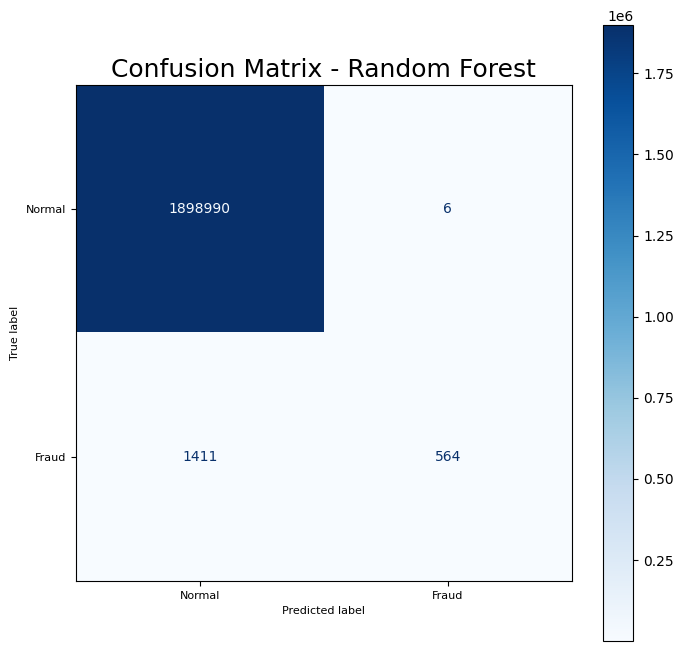

In [49]:
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Calcolo della Precision-Recall Area
precision_points_rf, recall_points_rf, _ = precision_recall_curve(y_test, y_pred_prob_rf)
pr_auc_rf = auc(recall_points_rf, precision_points_rf)

# Creazione di una tabella con le metriche
metrics_table = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score','ROC AUC', 'Precision-Recall AUC'],
    'Value': [precision_rf, recall_rf, f1_rf, roc_auc_rf, pr_auc_rf]
})

print("Metrics Random Forest:")
print(metrics_table)


# Creazione della confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Fraud'])

# Plot della confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d', ax=ax)

# Imposta il titolo con dimensione del font 18
ax.set_title('Confusion Matrix - Random Forest', fontsize=18)

# Imposta la dimensione del font degli assi a 8
ax.tick_params(axis='both', labelsize=8)

# Imposta la dimensione del font delle etichette degli assi a 8
ax.set_xlabel('Predicted label', fontsize=8)
ax.set_ylabel('True label', fontsize=8)

# Mostra il grafico
plt.show()

## XGB

In [38]:
# Creazone modello XGB
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=30,
    learning_rate=0.07,
    random_state=12
)

xgb_model.fit(X_train, y_train)

y_pred_XGB = xgb_model.predict(X_test)
y_pred_prob_XGB = xgb_model.predict_proba(X_test)[:, 1]

roc_auc_XGB = roc_auc_score(y_test, y_pred_prob_XGB)
print(f"Test AUC: {roc_auc_XGB}")

Test AUC: 0.9887034641169881


Metrics XGB:
                 Metric     Value
0             Precision  0.966821
1                Recall  0.634430
2              F1 Score  0.766127
3               ROC AUC  0.988703
4  Precision-Recall AUC  0.734956


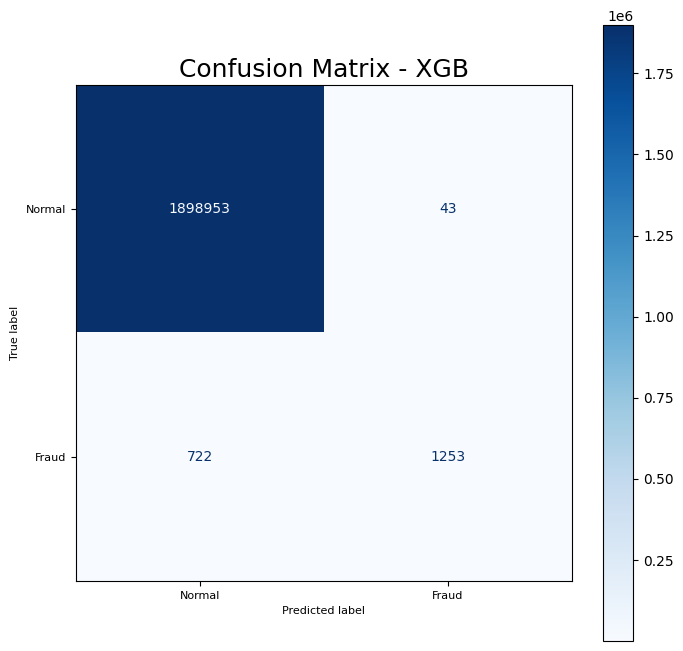

In [39]:
# Calcolo delle metriche
precision_XGB = precision_score(y_test, y_pred_XGB)
recall_XGB = recall_score(y_test, y_pred_XGB)
f1_XGB = f1_score(y_test, y_pred_XGB)

# Calcolo della Precision-Recall Area
precision_points_XGB, recall_points_XGB, _ = precision_recall_curve(y_test, y_pred_prob_XGB)
pr_auc_XGB = auc(recall_points_XGB, precision_points_XGB)

# Creazione di una tabella con le metriche
metrics_table = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'ROC AUC','Precision-Recall AUC'],
    'Value': [ precision_XGB, recall_XGB, f1_XGB, roc_auc_XGB, pr_auc_XGB]
})

print("Metrics XGB:")
print(metrics_table)


# Creazione della confusion matrix
cm = confusion_matrix(y_test, y_pred_XGB)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Fraud'])

# Plot della confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d', ax=ax)

# Imposta il titolo
ax.set_title('Confusion Matrix - XGB', fontsize=18)

# Imposta la dimensione del font degli assi a 8
ax.tick_params(axis='both', labelsize=8)

# Imposta la dimensione del font delle etichette degli assi a 8
ax.set_xlabel('Predicted label', fontsize=8)
ax.set_ylabel('True label', fontsize=8)
plt.show()

# MISCLASSIFIED TRANSACTION

In [40]:
# Fai le previsioni sul test set
y_test_pred = xgb_model.predict(X_test)  # Previsioni binarie (0 o 1)

# Recupera 'Laundering_type' per il test set. adesso uso il df_pre
laundering_type_test = df_pre.loc[X_test.index, 'Laundering_type']

# Confronta le previsioni con le etichette reali (y_test)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Identifica le previsioni sbagliate
false_positives = (y_test == 0) & (y_test_pred == 1)  # Falsi positivi
false_negatives = (y_test == 1) & (y_test_pred == 0)  # Falsi negativi

# Crea un DataFrame per analizzare i falsi positivi e falsi negativi
errors_df = pd.DataFrame({
    'True_Label': y_test,
    'Predicted_Label': y_test_pred,
    'Laundering_type': laundering_type_test
})

# Filtra i falsi positivi e falsi negativi
false_positives_df = errors_df[false_positives]
false_negatives_df = errors_df[false_negatives]

# Analizza i 'Laundering_type' dei falsi positivi
print("False Positive:")
print(false_positives_df['Laundering_type'].value_counts())

# Analizza i 'Laundering_type' dei falsi negativi
print("False Negative:")
print(false_negatives_df['Laundering_type'].value_counts())

Confusion Matrix:
[[1898953      43]
 [    722    1253]]
False Positive:
Laundering_type
Normal_Foward             14
Normal_Small_Fan_Out      10
Normal_Cash_Deposits       9
Normal_Cash_Withdrawal     6
Normal_Plus_Mutual         2
Normal_Mutual              2
Name: count, dtype: int64
False Negative:
Laundering_type
Layered_Fan_In          83
Structuring             80
Deposit-Send            78
Layered_Fan_Out         66
Stacked Bipartite       60
Fan_In                  59
Cycle                   56
Gather-Scatter          45
Bipartite               44
Cash_Withdrawal         34
Scatter-Gather          30
Fan_Out                 26
Behavioural_Change_1    25
Single_large            20
Smurfing                 9
Over-Invoicing           5
Behavioural_Change_2     2
Name: count, dtype: int64


In [41]:
false_positives_df['Laundering_type'].value_counts().head(10)

,count
Laundering_type,
Normal_Foward,14
Normal_Small_Fan_Out,10
Normal_Cash_Deposits,9
Normal_Cash_Withdrawal,6
Normal_Plus_Mutual,2
Normal_Mutual,2


In [42]:
false_negatives_df['Laundering_type'].value_counts().head(20)

,count
Laundering_type,
Layered_Fan_In,83
Structuring,80
Deposit-Send,78
Layered_Fan_Out,66
Stacked Bipartite,60
Fan_In,59
Cycle,56
Gather-Scatter,45
Bipartite,44


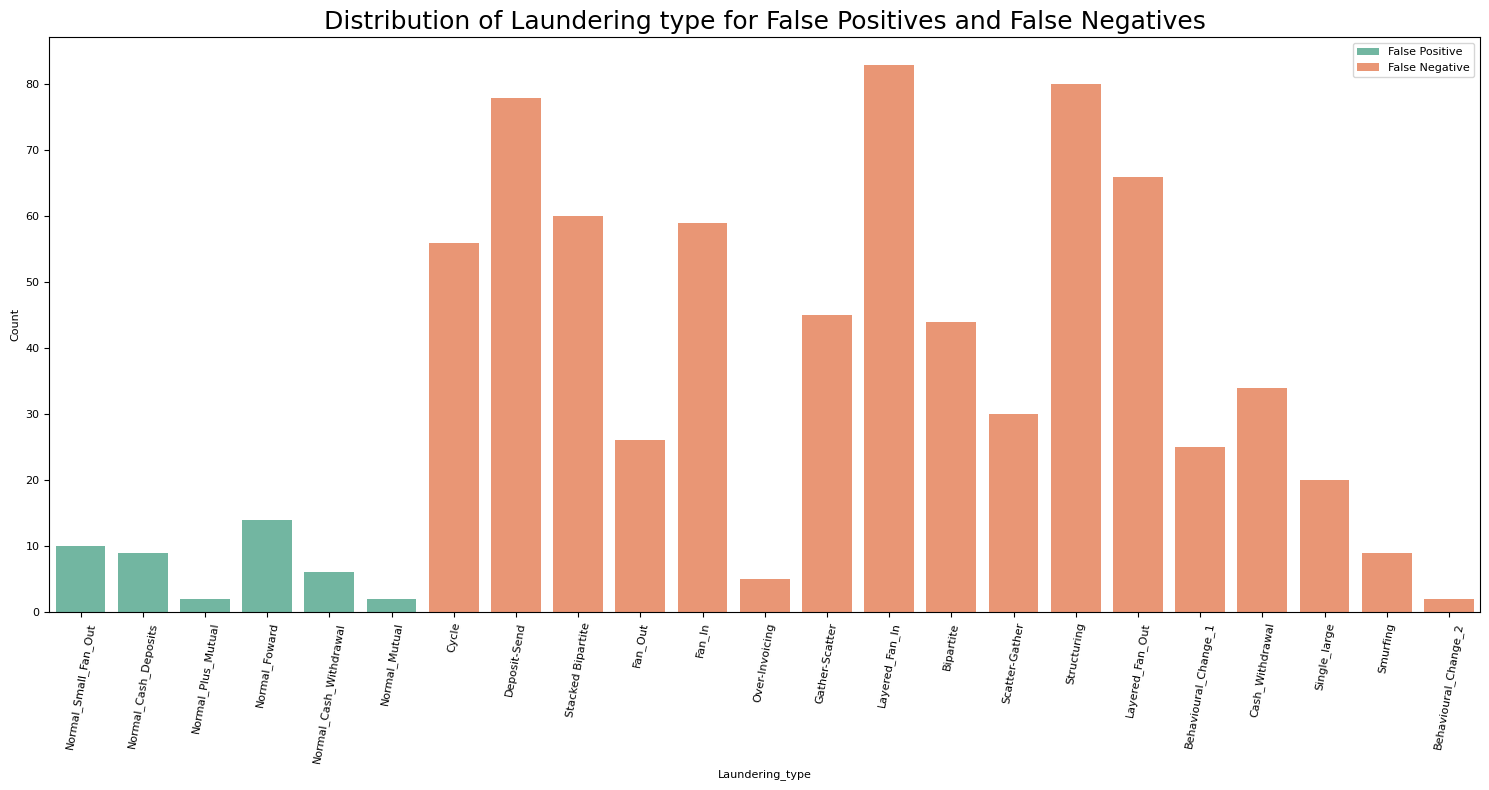

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combina i dati in un unico DataFrame per il grafico
combined_errors = pd.concat([
    false_positives_df.assign(Error_Type='False Positive'),
    false_negatives_df.assign(Error_Type='False Negative')
])

# Crea un grafico a barre
plt.figure(figsize=(15, 8))
sns.countplot(data=combined_errors, x='Laundering_type', hue='Error_Type', palette='Set2')

# Imposta la dimensione del font per titolo, etichette degli assi e ticks
plt.title('Distribution of Laundering type for False Positives and False Negatives', fontsize=18)
plt.xlabel('Laundering_type', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.xticks(rotation=80, fontsize=8)  # Riduci la dimensione del font per le etichette sull'asse x
plt.yticks(fontsize=8)  # Riduci la dimensione del font per le etichette sull'asse y
plt.tick_params(axis='both', labelsize=8) #riduci la dimensione dei tick
plt.legend(title='', title_fontsize=12, fontsize=8)  # Riduci la dimensione del font per la legenda

plt.tight_layout()
plt.show()

#FEATURE IMPORTANCE

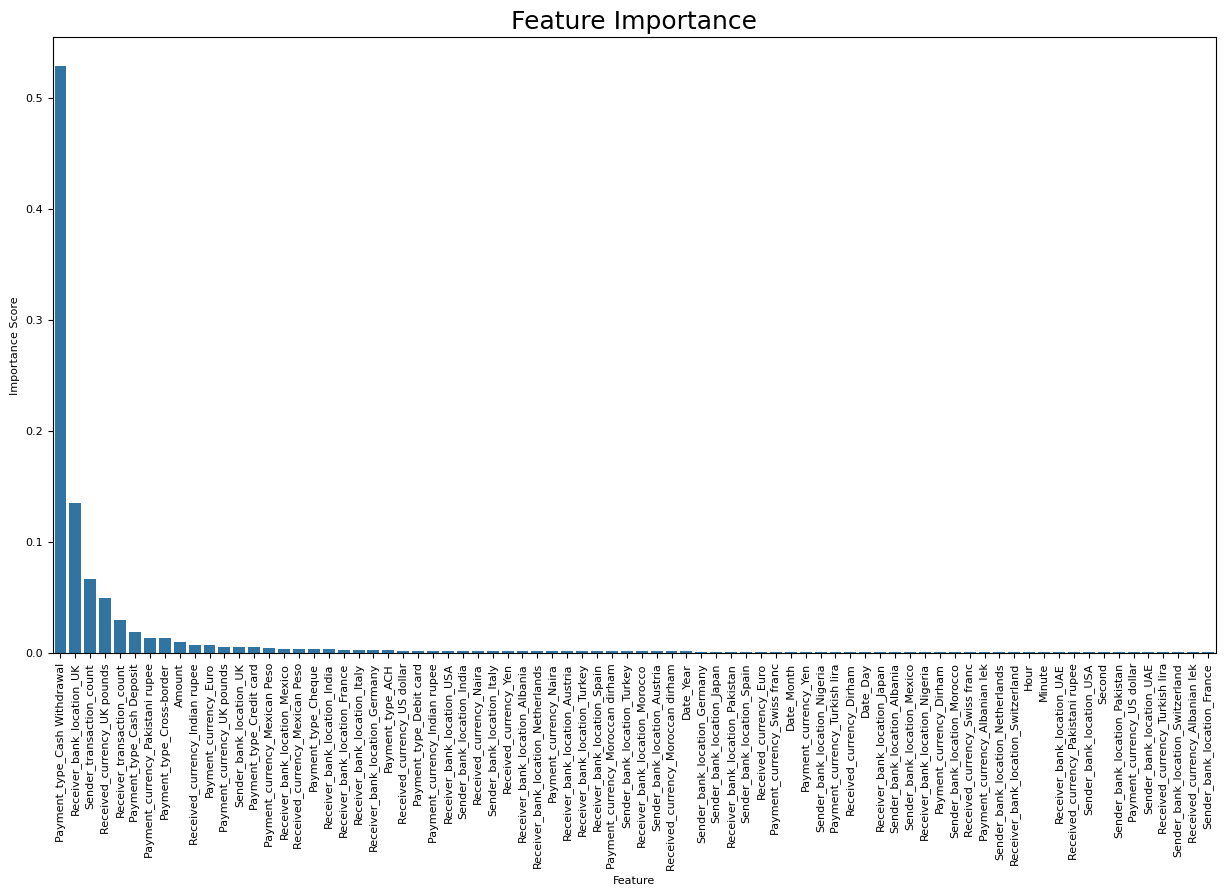

In [44]:
feature_importances = xgb_model.feature_importances_

# Crea un DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Ordina le feature per importanza
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# Crea il grafico a barre verticali
plt.figure(figsize=(15, 8))  # Regola le dimensioni del grafico
sns.barplot(x='Feature', y='Importance', data=feature_importance_df)  # Barre verticali
plt.title('Feature Importance', fontsize=18)
plt.xlabel('Feature', fontsize=8)
plt.ylabel('Importance Score', fontsize=8)
plt.xticks(rotation=90, fontsize=8)  # Ruota i nomi delle feature per una migliore leggibilità
plt.yticks(fontsize=8)
plt.show()

In [45]:
feature_importance_df.head(20)

,Feature,Importance
71,Payment_type_Cash Withdrawal,0.527993
67,Receiver_bank_location_UK,0.134678
76,Sender_transaction_count,0.066348
30,Received_currency_UK pounds,0.049245
77,Receiver_transaction_count,0.029915
70,Payment_type_Cash Deposit,0.018804
14,Payment_currency_Pakistani rupee,0.013577
74,Payment_type_Cross-border,0.013381
0,Amount,0.009972
23,Received_currency_Indian rupee,0.007707


# MODEL COMPARISON AND SELECTION

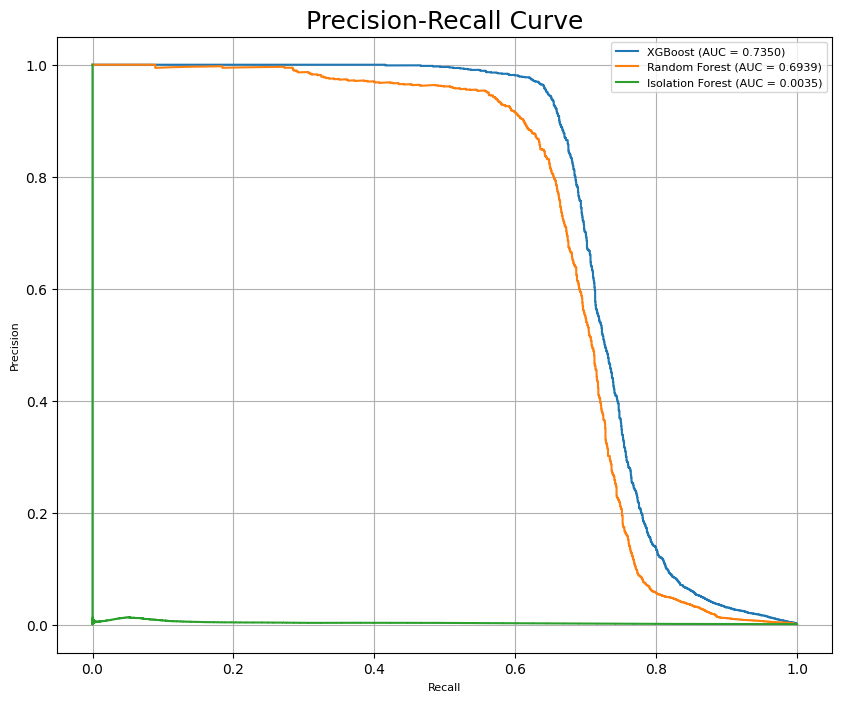

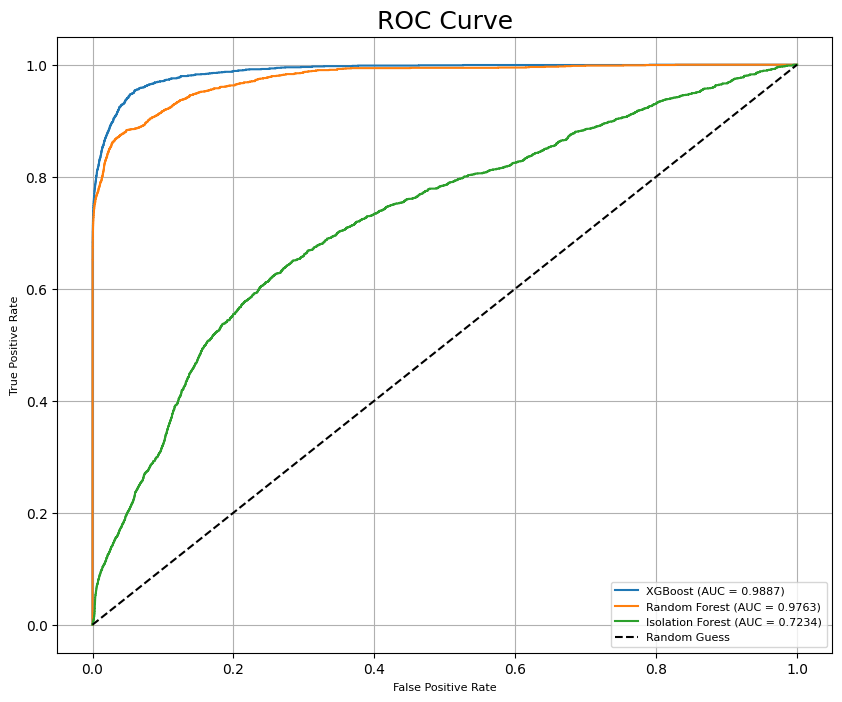

In [50]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Funzione per tracciare la Precision-Recall Curve
def plot_precision_recall_curve(y_true, y_scores, labels):
    plt.figure(figsize=(10, 8))

    for i, (y_score, label) in enumerate(zip(y_scores, labels)):
        precision, recall, _ = precision_recall_curve(y_true, y_score)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f'{label} (AUC = {pr_auc:.4f})')  # 4 decimali

    plt.xlabel('Recall', fontsize=8)
    plt.ylabel('Precision', fontsize=8)
    plt.title('Precision-Recall Curve', fontsize=18)
    plt.legend(loc='best', fontsize=8)
    plt.grid(True)
    plt.show()

# Funzione per tracciare la ROC Curve
def plot_roc_curve(y_true, y_scores, labels):
    plt.figure(figsize=(10, 8))

    for i, (y_score, label) in enumerate(zip(y_scores, labels)):
        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.4f})')  # 4 decimali

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate', fontsize=8)
    plt.ylabel('True Positive Rate', fontsize=8)
    plt.title('ROC Curve', fontsize=18)
    plt.legend(loc='best', fontsize=8)
    plt.grid(True)
    plt.show()

# Dati di esempio (sostituisci con i tuoi dati)
y_scores_models = [y_pred_prob_XGB, y_pred_prob_rf, -y_pred_scores_if]  # Probabilità o punteggi dei modelli
labels_models = ['XGBoost', 'Random Forest', 'Isolation Forest']

# Traccia le curve
plot_precision_recall_curve(y_test, y_scores_models, labels_models)
plot_roc_curve(y_test, y_scores_models, labels_models)